In [70]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [71]:
#define image1 here
image1 = np.array([[150,151,153,155,156,155,154],
                   [150,151,153,155,156,155,154],
                   [150,151,153,155,156,155,154],
                   [150,151,153,155,156,155,154],
                   [150,151,153,155,156,155,154]])  

# with cv2
image1 = np.array(image1, dtype=np.uint8)
            

In [72]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i,j]] += 1
    return hist

Text(0.5, 1.0, 'histogram')

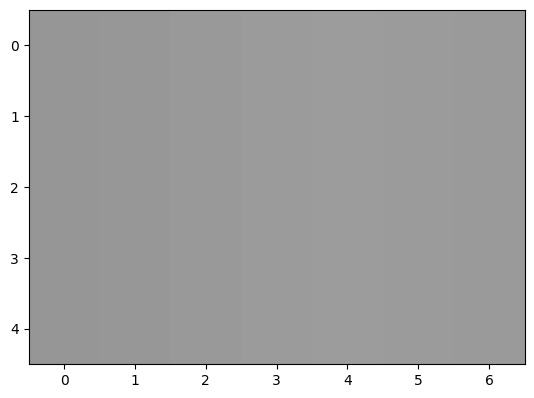

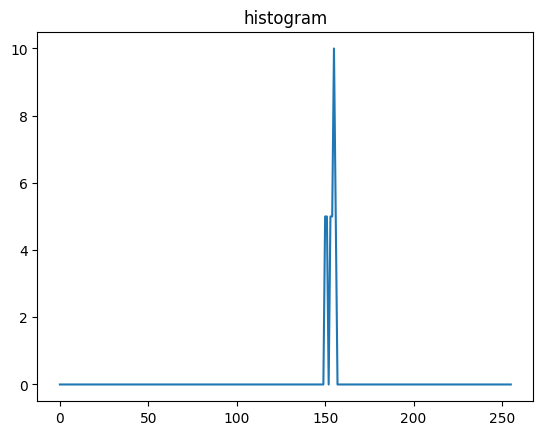

In [73]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [74]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  hist = calc_hist(image)
  cdf = np.cumsum(hist)
  cdf = cdf/cdf[-1]
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      output_image[i,j] = cdf[image[i,j]]*255
  return output_image

Text(0.5, 1.0, 'new histogram')

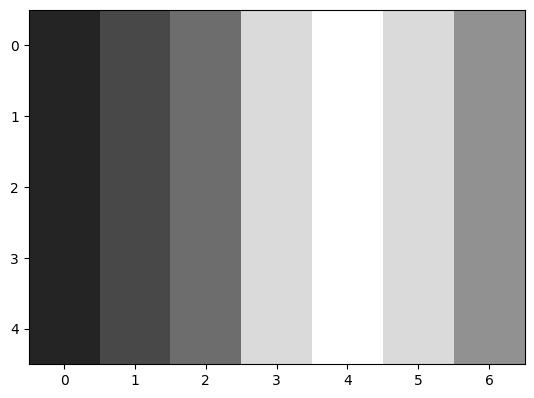

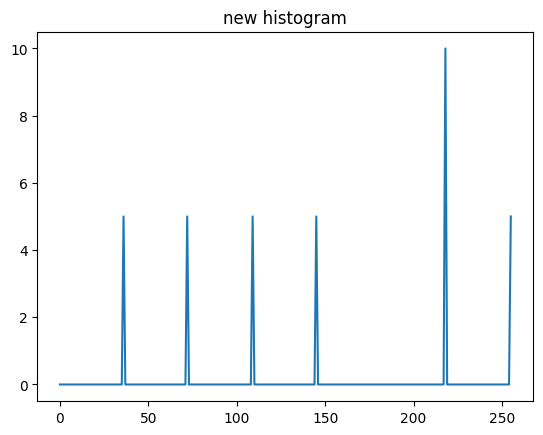

In [75]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


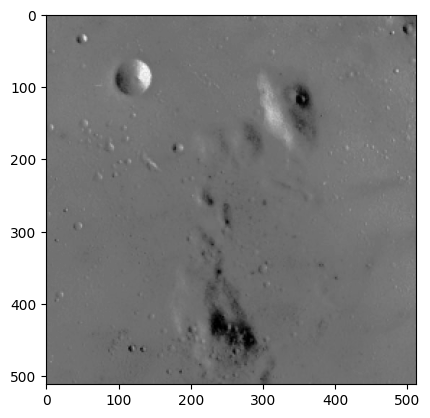

In [76]:
# first read the image and show it.(image2)
image2 = cv2.imread('Q3_image/image2.jpg',0)
plt.imshow(image2,cmap='gray',vmin=0,vmax=255)

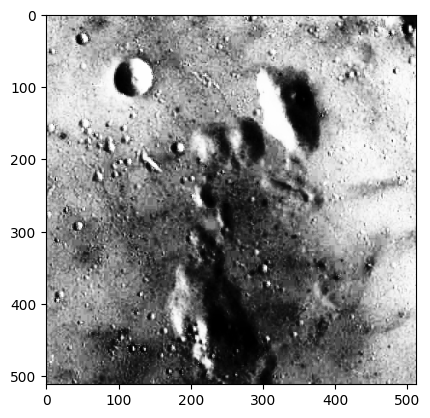

In [77]:
#use stretch function to improve quality of the image and show it
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)

In [78]:
#define new function that can improve this image
 
def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  hist = calc_hist(image)
  cdf = np.cumsum(hist)
  cdf = cdf/cdf[-1]
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i,j] > 100:
        output_image[i,j] = cdf[image[i,j]]*255
      else:
        output_image[i,j] = image[i,j]
  return output_image


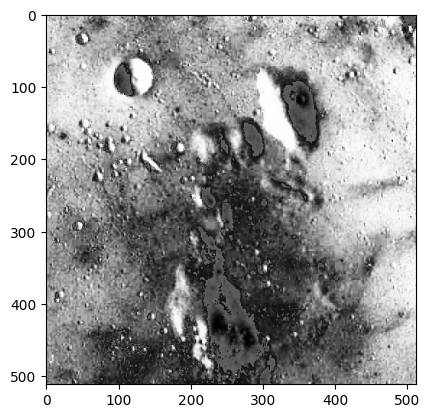

In [79]:
#try your new function and show the result
plt.imshow(modified_stretch_hist(image2),cmap='gray',vmin=0,vmax=255)